In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import textwrap
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from functools import reduce
import plotly as py
import plotly.graph_objs as go
import time

In [2]:
RKA = pd.read_excel("./data/RKA.xlsx")
RKA

,No,kdptimsmh,kdpstmsmh,Prodi,Jenjang,nimhsmsmh,nmmhsmsmh,tahun_lulus,f8,f504,...,f1605,f1606,f1607,f1608,f1609,f1610,f1611,f1612,f1613,f1614
0,1,41027,57101,Magister Sistem Informasi S2,S2,75115006,CAHYO HERMANTO,2018,1,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
1,2,41027,57101,Magister Sistem Informasi S2,S2,75115008,DODDY MAULANA YUSUF,2018,1,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,3,41027,57101,Magister Sistem Informasi S2,S2,75115014,MATAHARI,2018,1,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
3,4,41027,57101,Magister Sistem Informasi S2,S2,75115016,M. RIFQY ZAKARIA,2018,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,41027,57101,Magister Sistem Informasi S2,S2,75115019,SELIWATI,2018,1,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2826,41027,22201,Teknik Sipil S1,S1,13016021,NARDIANA,2020,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2826,2827,41027,22201,Teknik Sipil S1,S1,13014013,OKKY ALI SAPUTRA,2020,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,2828,41027,22201,Teknik Sipil S1,S1,13019701,RESZA BAYU ADHITYA,2020,1,1.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2828,2829,41027,22201,Teknik Sipil S1,S1,13016019,RUSLI GUSTIANA,2020,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = RKA 
data = data[data['Jenjang'] == 'S1']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 35 to 2829
Data columns (total 87 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2638 non-null   int64  
 1   kdptimsmh    2638 non-null   int64  
 2   kdpstmsmh    2638 non-null   int64  
 3   Prodi        2638 non-null   object 
 4   Jenjang      2638 non-null   object 
 5   nimhsmsmh    2638 non-null   int64  
 6   nmmhsmsmh    2638 non-null   object 
 7   tahun_lulus  2638 non-null   int64  
 8   f8           2638 non-null   int64  
 9   f504         2276 non-null   float64
 10  f502         1959 non-null   float64
 11  f505         2269 non-null   float64
 12  f506         1085 non-null   object 
 13  f5a1         2266 non-null   object 
 14  f5a2         2266 non-null   object 
 15  f1101        2224 non-null   object 
 16  f1102        875 non-null    object 
 17  f5b          2257 non-null   object 
 18  f5c          910 non-null    object 
 19  f5d  

In [5]:
df1 = data[['nimhsmsmh','nmmhsmsmh','Prodi','tahun_lulus','f1761','f1763','f1765','f1767','f1769','f1771','f1773']]
df1.head()

,nimhsmsmh,nmmhsmsmh,Prodi,tahun_lulus,f1761,f1763,f1765,f1767,f1769,f1771,f1773
35,10110346,DIONOFAN KURNIA PRATAMA,Teknik Informatika S1,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,4.0,4.0,5.0,4.0,4.0,3.0,4.0
37,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,3.0,3.0,4.0,4.0,3.0,4.0,4.0
38,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,3.0,3.0,2.0,3.0,2.0,3.0,4.0
39,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,3.0,3.0,3.0,4.0,2.0,2.0,4.0


In [6]:
#df1 = df1.replace(0, pd.np.nan)
#df1.head()

In [7]:
df2 = df1.rename(columns = {'nmmhsmsmh':'Nama','nimhsmsmh':'NIM','f1761':'Etika','f1763':'Keahlian_Bidang_Ilmu','f1765':'Bahasa_Inggris','f1767':'Penggunaan_Teknologi_Informasi','f1769':'Komunikasi','f1771':'Kerjasama_Tim','f1773':'Pengembangan_Diri'})
df2.head()

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
35,10110346,DIONOFAN KURNIA PRATAMA,Teknik Informatika S1,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,4.0,4.0,5.0,4.0,4.0,3.0,4.0
37,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,3.0,3.0,4.0,4.0,3.0,4.0,4.0
38,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,3.0,3.0,2.0,3.0,2.0,3.0,4.0
39,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,3.0,3.0,3.0,4.0,2.0,2.0,4.0


Text(0.5, 0, 'Attributes')

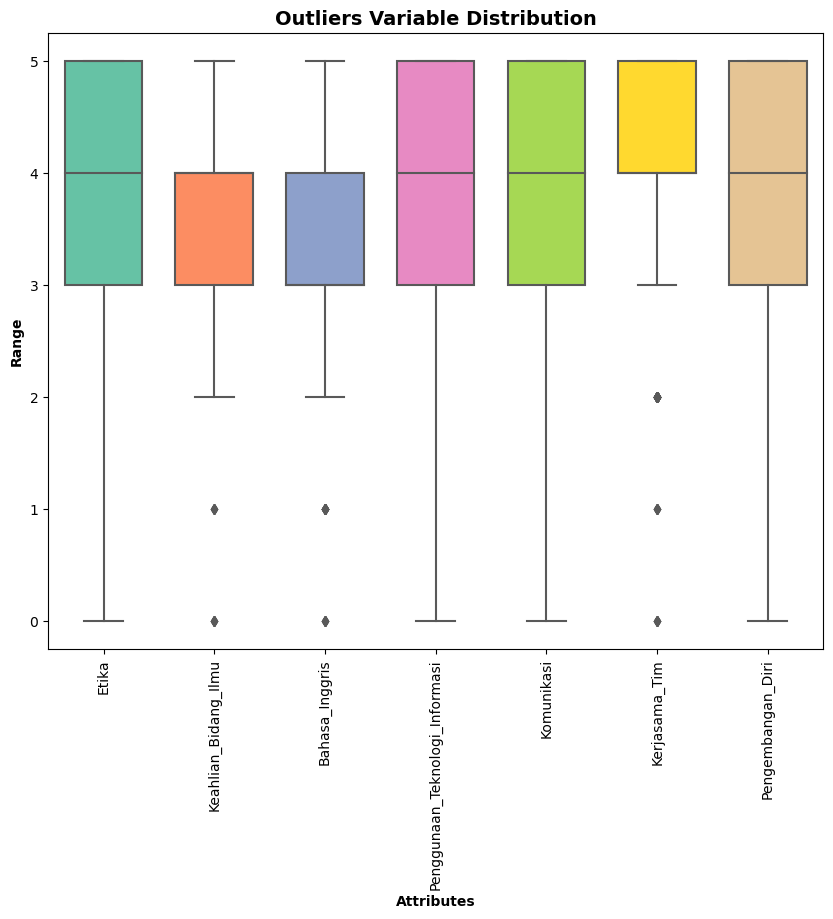

In [8]:
outliers = df2[['Etika', 'Keahlian_Bidang_Ilmu', 'Bahasa_Inggris', 'Penggunaan_Teknologi_Informasi', 'Komunikasi', 'Kerjasama_Tim', 'Pengembangan_Diri']]

plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = outliers, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [9]:
df2['Bahasa_Inggris'].value_counts()

3.0    1121
4.0     660
2.0     396
5.0     300
1.0      12
0.0       5
Name: Bahasa_Inggris, dtype: int64

In [10]:
df2['Keahlian_Bidang_Ilmu'].value_counts()

4.0    1013
3.0     934
5.0     449
2.0      92
0.0       5
1.0       4
Name: Keahlian_Bidang_Ilmu, dtype: int64

In [11]:
df2['Kerjasama_Tim'].value_counts()

4.0    1012
5.0     914
3.0     521
2.0      38
0.0       5
1.0       5
Name: Kerjasama_Tim, dtype: int64

In [12]:
df2[['tahun_lulus','NIM']] = df2[['tahun_lulus','NIM']].astype(str)
df2.reset_index(inplace=True, drop=True)
df2.dropna(how='any', axis=0, inplace=True)
df2

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
1,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,4.0,4.0,5.0,4.0,4.0,3.0,4.0
2,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,3.0,3.0,4.0,4.0,3.0,4.0,4.0
3,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,3.0,3.0,2.0,3.0,2.0,3.0,4.0
4,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,3.0,3.0,3.0,4.0,2.0,2.0,4.0
5,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,5.0,4.0,3.0,5.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2633,13016021,NARDIANA,Teknik Sipil S1,2020,4.0,4.0,3.0,4.0,4.0,4.0,4.0
2634,13014013,OKKY ALI SAPUTRA,Teknik Sipil S1,2020,4.0,3.0,3.0,3.0,3.0,3.0,3.0
2635,13019701,RESZA BAYU ADHITYA,Teknik Sipil S1,2020,3.0,3.0,3.0,4.0,4.0,4.0,4.0
2636,13016019,RUSLI GUSTIANA,Teknik Sipil S1,2020,3.0,3.0,3.0,4.0,4.0,5.0,4.0


In [13]:
df2.isnull().sum()

NIM                               0
Nama                              0
Prodi                             0
tahun_lulus                       0
Etika                             0
Keahlian_Bidang_Ilmu              0
Bahasa_Inggris                    0
Penggunaan_Teknologi_Informasi    0
Komunikasi                        0
Kerjasama_Tim                     0
Pengembangan_Diri                 0
dtype: int64

In [14]:
df2['Bahasa_Inggris'].value_counts()

3.0    1120
4.0     660
2.0     396
5.0     298
1.0      12
0.0       5
Name: Bahasa_Inggris, dtype: int64

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 1 to 2637
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NIM                             2491 non-null   object 
 1   Nama                            2491 non-null   object 
 2   Prodi                           2491 non-null   object 
 3   tahun_lulus                     2491 non-null   object 
 4   Etika                           2491 non-null   float64
 5   Keahlian_Bidang_Ilmu            2491 non-null   float64
 6   Bahasa_Inggris                  2491 non-null   float64
 7   Penggunaan_Teknologi_Informasi  2491 non-null   float64
 8   Komunikasi                      2491 non-null   float64
 9   Kerjasama_Tim                   2491 non-null   float64
 10  Pengembangan_Diri               2491 non-null   float64
dtypes: float64(7), object(4)
memory usage: 233.5+ KB


In [16]:
dfbin = df2
dfbin

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
1,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,4.0,4.0,5.0,4.0,4.0,3.0,4.0
2,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,3.0,3.0,4.0,4.0,3.0,4.0,4.0
3,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,3.0,3.0,2.0,3.0,2.0,3.0,4.0
4,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,3.0,3.0,3.0,4.0,2.0,2.0,4.0
5,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,5.0,4.0,3.0,5.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2633,13016021,NARDIANA,Teknik Sipil S1,2020,4.0,4.0,3.0,4.0,4.0,4.0,4.0
2634,13014013,OKKY ALI SAPUTRA,Teknik Sipil S1,2020,4.0,3.0,3.0,3.0,3.0,3.0,3.0
2635,13019701,RESZA BAYU ADHITYA,Teknik Sipil S1,2020,3.0,3.0,3.0,4.0,4.0,4.0,4.0
2636,13016019,RUSLI GUSTIANA,Teknik Sipil S1,2020,3.0,3.0,3.0,4.0,4.0,5.0,4.0


In [17]:
dfbin.isnull().sum()

NIM                               0
Nama                              0
Prodi                             0
tahun_lulus                       0
Etika                             0
Keahlian_Bidang_Ilmu              0
Bahasa_Inggris                    0
Penggunaan_Teknologi_Informasi    0
Komunikasi                        0
Kerjasama_Tim                     0
Pengembangan_Diri                 0
dtype: int64

# Binning

In [18]:
#calculate interquartile range
q11, q21, q31 = np.percentile(dfbin.iloc[:,[4]], [25 , 50, 75])
iqr1 = q31 - q11
bbawah1 = q11 - 1.5 * iqr1
batas1 = q31 + 1.5 * iqr1

q12, q22, q32 = np.percentile(dfbin.iloc[:,[5]], [25 , 50, 75])
iqr2 = q32 - q12
bbawah2 = q12 - 1.5 * iqr2
batas2 = q32 + 1.5 * iqr2

q13, q23, q33 = np.percentile(dfbin.iloc[:,[6]], [25 , 50, 75])
iqr3 = q33 - q13
bbawah3 = q13 - 1.5 * iqr3
batas3 = q33 + 1.5 * iqr3

q14, q24, q34 = np.percentile(dfbin.iloc[:,[7]], [25 , 50, 75])
iqr4 = q34 - q14
bbawah4 = q14 - 1.5 * iqr4
batas4 = q34 + 1.5 * iqr4

q15, q25, q35 = np.percentile(dfbin.iloc[:, [8]], [25 , 50, 75])
iqr5 = q35 - q15
bbawah5 = q15 - 1.5 * iqr5
batas5 = q35 + 1.5 * iqr5

q16, q26, q36 = np.percentile(dfbin.iloc[:,[9]], [25 , 50, 75])
iqr6 = q36 - q16
bbawah6 = q16 - 1.5 * iqr6
batas6 = q36 + 1.5 * iqr6

q17, q27, q37 = np.percentile(dfbin.iloc[:,[10]], [25 , 50, 75])
iqr7 = q37 - q17
bbawah7 = q17 - 1.5 * iqr7
batas7 = q37 + 1.5 * iqr7

In [19]:
outlieretika = dfbin.loc[(dfbin['Etika'] > batas1) | (dfbin['Etika'] < bbawah1)]
sizeoutlieretika = outlieretika.index.size

outlierbidangilmu = dfbin.loc[(dfbin['Keahlian_Bidang_Ilmu'] > batas2) | (dfbin['Keahlian_Bidang_Ilmu'] < bbawah2)]
sizeoutlierbidangilmu = outlierbidangilmu.index.size

outlierbahasainggris = dfbin.loc[(dfbin['Bahasa_Inggris'] > batas3) | (dfbin['Bahasa_Inggris'] < bbawah3)]
sizeoutlierbahasainggris = outlierbahasainggris.index.size

outlieroteknologiinformasi = dfbin.loc[(dfbin['Penggunaan_Teknologi_Informasi'] > batas4) | (dfbin['Penggunaan_Teknologi_Informasi'] < bbawah4)]
sizeoutlierpteknologiinformasi = outlieroteknologiinformasi.index.size

outlierkomunikasi = dfbin.loc[(dfbin['Komunikasi'] > batas5) | (dfbin['Komunikasi'] < bbawah5)]
sizeoutlierkomunikasi = outlierkomunikasi.index.size

outlierkerjasamatim = dfbin.loc[(dfbin['Kerjasama_Tim'] > batas6) | (dfbin['Kerjasama_Tim'] < bbawah6)]
sizeoutlierkerjasamatim = outlierkerjasamatim.index.size

outlierpengembangandiri = dfbin.loc[(dfbin['Pengembangan_Diri'] > batas7) | (dfbin['Pengembangan_Diri'] < bbawah7)]
sizeoutlierpengembangandiri = outlierpengembangandiri.index.size

In [20]:
print(sizeoutlieretika)
outlieretika.head()

0


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri


In [21]:
print(sizeoutlierbidangilmu)
outlierbidangilmu.head()

9


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
374,21212768,DENI SAPUTRA,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,21214024,NAZILA RADITYA EFFENDI,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,21214056,DEDEH DAHLIA,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,21214072,RAFI IRAWAN,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,21214173,AISYA REGINA S,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print(sizeoutlierbahasainggris)
outlierbahasainggris.head()

17


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
99,10113910,ZULI PRIYANTO,Teknik Informatika S1,2018,5.0,5.0,1.0,5.0,5.0,5.0,5.0
374,21212768,DENI SAPUTRA,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,21214024,NAZILA RADITYA EFFENDI,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,21214056,DEDEH DAHLIA,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,21214072,RAFI IRAWAN,Manajemen S1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(sizeoutlierpteknologiinformasi)
outlieroteknologiinformasi.head()

0


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri


In [24]:
print(sizeoutlierkomunikasi)
outlierkomunikasi.head()

0


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri


In [25]:
print(sizeoutlierkerjasamatim)
outlierkerjasamatim.head()

48


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
4,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,3.0,3.0,3.0,4.0,2.0,2.0,4.0
16,10112158,GUNAWAN,Teknik Informatika S1,2018,2.0,2.0,2.0,3.0,3.0,2.0,2.0
110,10114226,RENI NURAENI,Teknik Informatika S1,2018,3.0,3.0,2.0,3.0,3.0,2.0,4.0
135,10211013,TAUFIK ADI WICAKSONO,Sistem Komputer S1,2018,5.0,4.0,4.0,5.0,2.0,2.0,4.0
161,10213131,GUGUN GUNAWAN,Sistem Komputer S1,2018,4.0,3.0,4.0,4.0,3.0,2.0,4.0


In [26]:
print(sizeoutlierpengembangandiri)
outlierpengembangandiri.head(20)

0


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri


In [27]:
dfbin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 1 to 2637
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NIM                             2491 non-null   object 
 1   Nama                            2491 non-null   object 
 2   Prodi                           2491 non-null   object 
 3   tahun_lulus                     2491 non-null   object 
 4   Etika                           2491 non-null   float64
 5   Keahlian_Bidang_Ilmu            2491 non-null   float64
 6   Bahasa_Inggris                  2491 non-null   float64
 7   Penggunaan_Teknologi_Informasi  2491 non-null   float64
 8   Komunikasi                      2491 non-null   float64
 9   Kerjasama_Tim                   2491 non-null   float64
 10  Pengembangan_Diri               2491 non-null   float64
dtypes: float64(7), object(4)
memory usage: 233.5+ KB


In [28]:
binetika = dfbin[['NIM','Etika']].copy()
binebidangilmu = dfbin[['NIM','Keahlian_Bidang_Ilmu']].copy()
binbahasainggris = dfbin[['NIM','Bahasa_Inggris']].copy()
bininformasi = dfbin[['NIM','Penggunaan_Teknologi_Informasi']].copy()
binkomunikasi = dfbin[['NIM','Komunikasi']].copy()
binkerjasamatim = dfbin[['NIM','Kerjasama_Tim']].copy()
binpengembangandiri = dfbin[['NIM','Pengembangan_Diri']].copy()

In [29]:
binpengembangandiri.head(50)

,NIM,Pengembangan_Diri
1,10111023,4.0
2,10111095,4.0
3,10111101,4.0
4,10111122,4.0
5,10111123,5.0
7,10111681,4.0
8,10111688,5.0
9,10111704,3.0
10,10112048,3.0
11,10112051,5.0


In [30]:
dfbin.drop(['Etika','Keahlian_Bidang_Ilmu','Bahasa_Inggris','Penggunaan_Teknologi_Informasi', 'Komunikasi',
         'Kerjasama_Tim','Pengembangan_Diri'], axis=1, inplace=True)

In [31]:
dataset = dfbin
dataset.isnull().sum()

NIM            0
Nama           0
Prodi          0
tahun_lulus    0
dtype: int64

# binning etika

In [32]:
row1 = binetika.index.size
print('Total baris data =', row1)

squareroot1 = np.sqrt(row1)
print('Akar jumlah baris data =', squareroot1)

binsum1 = np.round(squareroot1)
print('Setelah akar dibulatkan =', binsum1)

qlabels1 = []
for i in range(1,int(binsum1)+1):
    t1 = i
    qlabels1.append(t1)
print(qlabels1)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [33]:
binetika = binetika.sort_values(by=['Etika'])
binetika = binetika.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binsetika = pd.qcut(binetika.index, q=int(binsum1), labels=qlabels1)
binetika['Bin'] = binsetika

binetika['Etika'] = binetika.groupby('Bin')['Etika'].transform('mean')
binetika.drop(['Bin'], axis=1, inplace=True)
binetika

,NIM,Etika
0,21214056,1.98
1,21212768,1.98
2,21214024,1.98
3,51913299,1.98
4,21214173,1.98
...,...,...
2486,10114319,5.00
2487,41816118,5.00
2488,10114318,5.00
2489,10114444,5.00


# Binning Keahlian_bidang_ILMU

In [34]:
row2 = binebidangilmu.index.size
print('Total baris data =', row2)

squareroot2 = np.sqrt(row2)
print('Akar jumlah baris data =', squareroot2)

binsum2 = np.round(squareroot2)
print('Setelah akar dibulatkan =', binsum2)

qlabels2 = []
for i in range(1,int(binsum2)+1):
    t2 = i
    qlabels2.append(t2)
print(qlabels2)    

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [35]:
binebidangilmu = binebidangilmu.sort_values(by=['Keahlian_Bidang_Ilmu'])
binebidangilmu = binebidangilmu.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binsebidangilmu = pd.qcut(binebidangilmu.index, q=int(binsum2), labels=qlabels2)
binebidangilmu['Bin'] = binsebidangilmu

binebidangilmu['Keahlian_Bidang_Ilmu'] = binebidangilmu.groupby('Bin')['Keahlian_Bidang_Ilmu'].transform('mean')
binebidangilmu.drop(['Bin'], axis=1, inplace=True)
binebidangilmu

,NIM,Keahlian_Bidang_Ilmu
0,21214024,1.72
1,21214056,1.72
2,21214072,1.72
3,21214173,1.72
4,21212768,1.72
...,...,...
2486,10514067,5.00
2487,51914230,5.00
2488,51916148,5.00
2489,51916013,5.00


# Keahlian Bahasa Inggris

In [36]:
row3 = binbahasainggris.index.size
print('Total baris data =', row3)

squareroot3 = np.sqrt(row3)
print('Akar jumlah baris data =', squareroot3)

binsum3 = np.round(squareroot3)
print('Setelah akar dibulatkan =', binsum3)

qlabels3 = []
for i in range(1,int(binsum3)+1):
    t3 = i
    qlabels3.append(t3)
print(qlabels3)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [37]:
binbahasainggris = binbahasainggris.sort_values(by=['Bahasa_Inggris'])
binbahasainggris = binbahasainggris.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binsbahasainggris = pd.qcut(binbahasainggris.index, q=int(binsum3), labels=qlabels3)
binbahasainggris['Bin'] = binsbahasainggris

binbahasainggris['Bahasa_Inggris'] = binbahasainggris.groupby('Bin')['Bahasa_Inggris'].transform('mean')
binbahasainggris.drop(['Bin'], axis=1, inplace=True)
binbahasainggris

,NIM,Bahasa_Inggris
0,21214173,1.56
1,21214072,1.56
2,21214056,1.56
3,21214024,1.56
4,21212768,1.56
...,...,...
2486,10114533,5.00
2487,21214124,5.00
2488,51914185,5.00
2489,10115037,5.00


# bin penggunaan teknologi informasi

In [38]:
row4 = bininformasi.index.size
print('Total baris data =', row4)

squareroot4 = np.sqrt(row4)
print('Akar jumlah baris data =', squareroot4)

binsum4 = np.round(squareroot4)
print('Setelah akar dibulatkan =', binsum4)

qlabels4 = []
for i in range(1,int(binsum4)+1):
    t4 = i
    qlabels4.append(t4)
print(qlabels4)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [39]:
bininformasi = bininformasi.sort_values(by=['Penggunaan_Teknologi_Informasi'])
bininformasi = bininformasi.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binsinformasi = pd.qcut(bininformasi.index, q=int(binsum4), labels=qlabels4)
bininformasi['Bin'] = binsinformasi

bininformasi['Penggunaan_Teknologi_Informasi'] = bininformasi.groupby('Bin')['Penggunaan_Teknologi_Informasi'].transform('mean')
bininformasi.drop(['Bin'], axis=1, inplace=True)
bininformasi.isnull().sum()

NIM                               0
Penggunaan_Teknologi_Informasi    0
dtype: int64

# Bin Komunikasi

In [40]:
row5 = binkomunikasi.index.size
print('Total baris data =', row5)

squareroot5 = np.sqrt(row5)
print('Akar jumlah baris data =', squareroot5)

binsum5 = np.round(squareroot5)
print('Setelah akar dibulatkan =', binsum5)

qlabels5 = []
for i in range(1,int(binsum5)+1):
    t5 = i
    qlabels5.append(t5)
print(qlabels5)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [41]:
binkomunikasi = binkomunikasi.sort_values(by=['Komunikasi'])
binkomunikasi = binkomunikasi.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binskomunikasi = pd.qcut(binkomunikasi.index, q=int(binsum5), labels=qlabels5)
binkomunikasi['Bin'] = binskomunikasi

binkomunikasi['Komunikasi'] = binkomunikasi.groupby('Bin')['Komunikasi'].transform('mean')
binkomunikasi.drop(['Bin'], axis=1, inplace=True)
binkomunikasi.head()

,NIM,Komunikasi
0,21214024,1.7
1,21214056,1.7
2,21214072,1.7
3,21212768,1.7
4,21214173,1.7


# bin Kerjasama_Tim

In [42]:
row6 = binkerjasamatim.index.size
print('Total baris data =', row6)

squareroot6 = np.sqrt(row6)
print('Akar jumlah baris data =', squareroot6)

binsum6 = np.round(squareroot6)
print('Setelah akar dibulatkan =', binsum6)

qlabels6 = []
for i in range(1,int(binsum6)+1):
    t6 = i
    qlabels6.append(t6)
print(qlabels6)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [43]:
binkerjasamatim = binkerjasamatim.sort_values(by=['Kerjasama_Tim'])
binkerjasamatim = binkerjasamatim.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binskerjasamatim = pd.qcut(binkerjasamatim.index, q=int(binsum6), labels=qlabels6)
binkerjasamatim['Bin'] = binskerjasamatim

binkerjasamatim['Kerjasama_Tim'] = binkerjasamatim.groupby('Bin')['Kerjasama_Tim'].transform('mean')
binkerjasamatim.drop(['Bin'], axis=1, inplace=True)
binkerjasamatim

,NIM,Kerjasama_Tim
0,21214072,1.74
1,21214173,1.74
2,21214024,1.74
3,21212768,1.74
4,21214056,1.74
...,...,...
2486,10215051,5.00
2487,21216405,5.00
2488,10215052,5.00
2489,41814055,5.00


# Bin Pengembangan Diri

In [44]:
row7 = binpengembangandiri.index.size
print('Total baris data =', row7)

squareroot7 = np.sqrt(row7)
print('Akar jumlah baris data =', squareroot7)

binsum7 = np.round(squareroot7)
print('Setelah akar dibulatkan =', binsum7)

qlabels7 = []
for i in range(1,int(binsum7)+1):
    t7 = i
    qlabels7.append(t7)
print(qlabels7)

Total baris data = 2491
Akar jumlah baris data = 49.90991885387112
Setelah akar dibulatkan = 50.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [45]:
binpengembangandiri = binpengembangandiri.sort_values(by=['Pengembangan_Diri'])
binpengembangandiri = binpengembangandiri.reset_index(drop=True)

# Membuat bin dengan jumlah anggota bin yang sama
binspengembangandiri = pd.qcut(binpengembangandiri.index, q=int(binsum7), labels=qlabels7)
binpengembangandiri['Bin'] = binspengembangandiri

binpengembangandiri['Pengembangan_Diri'] = binpengembangandiri.groupby('Bin')['Pengembangan_Diri'].transform('mean')
binpengembangandiri.drop(['Bin'], axis=1, inplace=True)
binpengembangandiri

,NIM,Pengembangan_Diri
0,21214072,1.94
1,21214056,1.94
2,21214024,1.94
3,21214173,1.94
4,21212768,1.94
...,...,...
2486,10114188,5.00
2487,51915183,5.00
2488,44313032,5.00
2489,51916254,5.00


In [46]:
newdata = pd.concat([dfbin, binetika, binebidangilmu, binbahasainggris, bininformasi, binkomunikasi, binkerjasamatim, binpengembangandiri], axis =1, join="inner")

In [47]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 1 to 2490
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NIM                             2345 non-null   object 
 1   Nama                            2345 non-null   object 
 2   Prodi                           2345 non-null   object 
 3   tahun_lulus                     2345 non-null   object 
 4   NIM                             2345 non-null   object 
 5   Etika                           2345 non-null   float64
 6   NIM                             2345 non-null   object 
 7   Keahlian_Bidang_Ilmu            2345 non-null   float64
 8   NIM                             2345 non-null   object 
 9   Bahasa_Inggris                  2345 non-null   float64
 10  NIM                             2345 non-null   object 
 11  Penggunaan_Teknologi_Informasi  2345 non-null   float64
 12  NIM                             23

In [48]:
newdata1 = newdata.iloc[:,[0,1,2,3,5,7,9,11,13,15,17]].reset_index()
newdata1.drop(['index'], axis=1, inplace=True)

In [49]:
newdata1.isnull().sum()

NIM                               0
Nama                              0
Prodi                             0
tahun_lulus                       0
Etika                             0
Keahlian_Bidang_Ilmu              0
Bahasa_Inggris                    0
Penggunaan_Teknologi_Informasi    0
Komunikasi                        0
Kerjasama_Tim                     0
Pengembangan_Diri                 0
dtype: int64

In [50]:
df3 = newdata1

In [51]:
df3['Etika'] = df3['Etika'].round(1)
df3['Keahlian_Bidang_Ilmu'] = df3['Keahlian_Bidang_Ilmu'].round(1)
df3['Bahasa_Inggris'] = df3['Bahasa_Inggris'].round(1)
df3['Informasi'] = df3['Penggunaan_Teknologi_Informasi'].round(1)
df3['Komunikasi'] = df3['Komunikasi'].round(1)
df3['Kerjasama_Tim'] = df3['Kerjasama_Tim'].round(1)
df3['Pengembangan_Diri'] = df3['Pengembangan_Diri'].round(1)

In [52]:
df3

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2340,10113393,MOCHAMAD SYIDIK F.,Teknik Informatika S1,2019,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2341,10115386,MOCHAMAD YOGA ADIJAYA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2342,10115150,MOCHAMMAD GIFFARY NUGRAPRATAMA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2343,10116268,MOCHAMMAD LUTFI ABDULHAKIM,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0


In [53]:
data1 = df3.iloc[:, 4:13]
data1

,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi
0,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
1,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
2,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
3,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
4,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9
...,...,...,...,...,...,...,...,...
2340,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2341,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2342,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0
2343,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0


In [54]:
scaler = StandardScaler()
# fit_transform
data1_scaled = scaler.fit_transform(data1)
data1_scaled

array([[-2.59899288, -2.55857342, -1.94793943, ..., -3.15988817,
        -2.80277925, -2.76207515],
       [-2.59899288, -2.55857342, -1.94793943, ..., -3.15988817,
        -2.80277925, -2.76207515],
       [-2.59899288, -2.55857342, -1.94793943, ..., -3.15988817,
        -2.80277925, -2.76207515],
       ...,
       [ 1.29692132,  1.52632866,  1.79941757, ...,  1.0534231 ,
         1.15803095,  1.24961399],
       [ 1.29692132,  1.52632866,  1.79941757, ...,  1.0534231 ,
         1.15803095,  1.24961399],
       [ 1.29692132,  1.52632866,  1.79941757, ...,  1.0534231 ,
         1.15803095,  1.24961399]])

In [55]:
hasil = pd.DataFrame(data1_scaled, columns=data1.columns)
hasil

,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi
0,-2.598993,-2.558573,-1.947939,-2.722391,-2.694898,-3.159888,-2.802779,-2.762075
1,-2.598993,-2.558573,-1.947939,-2.722391,-2.694898,-3.159888,-2.802779,-2.762075
2,-2.598993,-2.558573,-1.947939,-2.722391,-2.694898,-3.159888,-2.802779,-2.762075
3,-2.598993,-2.558573,-1.947939,-2.722391,-2.694898,-3.159888,-2.802779,-2.762075
4,-2.598993,-2.558573,-1.947939,-2.722391,-2.694898,-3.159888,-2.802779,-2.762075
...,...,...,...,...,...,...,...,...
2340,1.296921,1.526329,1.799418,1.253759,1.204737,1.053423,1.158031,1.249614
2341,1.296921,1.526329,1.799418,1.253759,1.204737,1.053423,1.158031,1.249614
2342,1.296921,1.526329,1.799418,1.253759,1.204737,1.053423,1.158031,1.249614
2343,1.296921,1.526329,1.799418,1.253759,1.204737,1.053423,1.158031,1.249614


In [56]:
result = {}

for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(data1_scaled)
    db_index = davies_bouldin_score(data1_scaled,labels)
    result.update({i: db_index})

In [57]:
result1 = pd.DataFrame(result.values(), result.keys())
result1

,0
2,0.691676
3,0.528915
4,0.433750
5,0.566599
6,0.551367
7,0.482601
8,0.516011
9,0.439192
10,0.395851
11,0.352103


In [58]:
result1.idxmin().min()

19

In [59]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10 ,max_iter=111, 
                        tol=0.0001,  random_state= 2000 , algorithm='elkan'))
algorithm.fit(data1)
labels2 = algorithm.labels_

In [60]:
df3['Kelompok'] = labels2
df3

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,1
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,1
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,1
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,1
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,10113393,MOCHAMAD SYIDIK F.,Teknik Informatika S1,2019,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,0
2341,10115386,MOCHAMAD YOGA ADIJAYA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,0
2342,10115150,MOCHAMMAD GIFFARY NUGRAPRATAMA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,0
2343,10116268,MOCHAMMAD LUTFI ABDULHAKIM,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,0


In [61]:
def ubah_Cluster(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    elif x == 2:
        return 3
    elif x == 3:
        return 4
    elif x == 4:
        return 5
    elif x == 5:
        return 6
    elif x == 6:
        return 7
    elif x == 7:
        return 8


df3['Kelompok'] = df3['Kelompok'].apply(ubah_Cluster)

In [62]:
df3

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,10113393,MOCHAMAD SYIDIK F.,Teknik Informatika S1,2019,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,1
2341,10115386,MOCHAMAD YOGA ADIJAYA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,1
2342,10115150,MOCHAMMAD GIFFARY NUGRAPRATAMA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,1
2343,10116268,MOCHAMMAD LUTFI ABDULHAKIM,Teknik Informatika S1,2020,5.0,5.0,5.0,5.00,5.0,5.0,5.0,5.0,1


In [63]:
df3[(df3['Bahasa_Inggris'] > 3) | (df3['Keahlian_Bidang_Ilmu'] > 3)]

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
858,10115289,DERANDI HERMANDA,Teknik Informatika S1,2019,4.0,3.3,3.0,4.0,4.0,4.0,4.0,4.0,2
859,10115293,VALERIAN DWI PURNOMO,Teknik Informatika S1,2019,4.0,3.3,3.0,4.0,4.0,4.0,4.0,4.0,2
860,10115299,RAIHAN ABDAN SYAKURAN,Teknik Informatika S1,2019,4.0,3.3,3.0,4.0,4.0,4.0,4.0,4.0,2
861,10115300,ADITYA ILHAM RAMADHAN,Teknik Informatika S1,2019,4.0,3.3,3.0,4.0,4.0,4.0,4.0,4.0,2
862,10115310,BARRUR RHOZI,Teknik Informatika S1,2019,4.0,3.3,3.0,4.0,4.0,4.0,4.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,10113393,MOCHAMAD SYIDIK F.,Teknik Informatika S1,2019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2341,10115386,MOCHAMAD YOGA ADIJAYA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2342,10115150,MOCHAMMAD GIFFARY NUGRAPRATAMA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2343,10116268,MOCHAMMAD LUTFI ABDULHAKIM,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1


In [64]:
df3[(df3['Bahasa_Inggris'] < 3) | (df3['Keahlian_Bidang_Ilmu'] < 3)]

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,21214075,YUSUF PURWANEGARA,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
379,21214089,ARY VIRGIANSYAH HIDAYAT,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
380,21214093,FITRIANA AYU PRATIWI,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
381,21214105,MOHAMAD RIZKI HIDAYAT,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NIM                             2345 non-null   object 
 1   Nama                            2345 non-null   object 
 2   Prodi                           2345 non-null   object 
 3   tahun_lulus                     2345 non-null   object 
 4   Etika                           2345 non-null   float64
 5   Keahlian_Bidang_Ilmu            2345 non-null   float64
 6   Bahasa_Inggris                  2345 non-null   float64
 7   Penggunaan_Teknologi_Informasi  2345 non-null   float64
 8   Komunikasi                      2345 non-null   float64
 9   Kerjasama_Tim                   2345 non-null   float64
 10  Pengembangan_Diri               2345 non-null   float64
 11  Informasi                       2345 non-null   float64
 12  Kelompok                        23

In [66]:
df4 = df3[df3['Kelompok'] == 1]
df5 = df3[df3['Kelompok'] == 2]

In [67]:
df5[(df5['Bahasa_Inggris'] < 3) | (df5['Keahlian_Bidang_Ilmu'] < 3)]

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,21214075,YUSUF PURWANEGARA,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
379,21214089,ARY VIRGIANSYAH HIDAYAT,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
380,21214093,FITRIANA AYU PRATIWI,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2
381,21214105,MOHAMAD RIZKI HIDAYAT,Manajemen S1,2018,3.0,3.0,2.7,3.00,3.0,3.0,3.0,3.0,2


In [68]:
data2 = df3[['Etika','Bahasa_Inggris','Keahlian_Bidang_Ilmu','Penggunaan_Teknologi_Informasi','Komunikasi','Kerjasama_Tim','Pengembangan_Diri']]


frame = {}
for x in data2:
    frame[x] = np.round(np.average(data2[x]),2)

    
dataf = pd.DataFrame(frame, index=[1])
dataf

,Etika,Bahasa_Inggris,Keahlian_Bidang_Ilmu,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
1,4.0,3.37,3.77,4.04,3.98,4.17,4.09


In [69]:
print('Dari hasil pengelompokkan didapatkan nilai rata-rata kemampuan kompetensi mulai dari Atribut: ')
for i in dataf:
    print(i ,'dengan nilai', dataf[i].values[0])

Dari hasil pengelompokkan didapatkan nilai rata-rata kemampuan kompetensi mulai dari Atribut: 
Etika dengan nilai 4.0
Bahasa_Inggris dengan nilai 3.37
Keahlian_Bidang_Ilmu dengan nilai 3.77
Penggunaan_Teknologi_Informasi dengan nilai 4.04
Komunikasi dengan nilai 3.98
Kerjasama_Tim dengan nilai 4.17
Pengembangan_Diri dengan nilai 4.09


In [70]:
df_label = dataf.apply(min, axis=0)
teks1 = f'Atribut yang memiliki nilai rata-rata terendah adalah kemampuan kompetensi {df_label.idxmin()} dengan nilai {df_label.min()}. Ini bisa menjadi langkah untuk BKKLA dalam mencari pelatihan yang sesuai dengan kompetensi alumni dan bisa juga menjadi masukan untuk prodi dalam meningkatkan mata kuliah yang dirasa kurang berdasarkan data RKA'
teks1

'Atribut yang memiliki nilai rata-rata terendah adalah kemampuan kompetensi Bahasa_Inggris dengan nilai 3.37. Ini bisa menjadi langkah untuk BKKLA dalam mencari pelatihan yang sesuai dengan kompetensi alumni dan bisa juga menjadi masukan untuk prodi dalam meningkatkan mata kuliah yang dirasa kurang berdasarkan data RKA'

In [71]:
gk = pd.DataFrame(df4.groupby(['Prodi','Bahasa_Inggris'])['Bahasa_Inggris'].count())
gk.rename(columns = {'Bahasa_Inggris': 'Jumlah Alumni'},inplace=True)
#gk.sort_values(by='Bahasa_Inggris',ascending=False)

gk_reset = gk.reset_index()
#prodi_terbaik = gk_reset.iloc[0]['Prodi']
#prodi_terbaik
gk_reset.sort_values(by="Bahasa_Inggris", ascending=False, inplace=True)
gk_reset
#gk_reset.drop(columns=['index'], inplace=True)

,Prodi,Bahasa_Inggris,Jumlah Alumni
17,Teknik Informatika S1,5.0,178
16,Teknik Industri S1,5.0,4
15,Teknik Elektro S1,5.0,24
14,Teknik Arsitektur S1,5.0,12
13,Sistem Komputer S1,5.0,35
12,Sistem Informasi S1,5.0,46
1,Desain Interior S1,4.0,36
11,Sistem Informasi S1,4.0,81
10,Sastra Jepang S1,4.0,30
0,Akuntansi S1,4.0,82


In [72]:
gk_reset.iloc[0:3][['Prodi','Bahasa_Inggris','Jumlah Alumni']].reset_index(drop=True)

,Prodi,Bahasa_Inggris,Jumlah Alumni
0,Teknik Informatika S1,5.0,178
1,Teknik Industri S1,5.0,4
2,Teknik Elektro S1,5.0,24


In [73]:
gk1 = pd.DataFrame(df5.groupby(['Prodi','Pengembangan_Diri'])['Pengembangan_Diri'].count())
gk1= gk1.rename(columns = {'Pengembangan_Diri':'Jumlah Alumni','Cluster':'elompok'})
gk1.sort_values(by='Pengembangan_Diri',ascending=True)

,,Jumlah Alumni
Prodi,Pengembangan_Diri,
Teknik Informatika S1,1.9,44
Akuntansi S1,3.0,68
Teknik Arsitektur S1,3.0,11
Teknik Sipil S1,3.0,7
Perencanaan Wilayah dan Kota S1,3.0,11
Manajemen S1,3.0,75
Teknik Elektro S1,3.0,7
Ilmu Pemerintahan S1,3.0,17
Sistem Informasi S1,3.0,78


In [74]:
df5[(df5['Pengembangan_Diri'] < 4) & (df5['Prodi'] == 'Akuntansi S1')]

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
277,21110752,NOVRAS ALDITH PRADIPTA,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
278,21112010,NURUL MUTIA,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
279,21113071,MUHAMMAD FAHIR SHAFAR ROZI,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
280,21113117,FIKRI ALAN RAMDHANI,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
281,21113122,TATYA HARDIANTI,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,21114227,TEGUH IMAM SYAFI'I,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
341,21114228,IRMAYANTI RIHSANNY,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
342,21114231,AGUSNINGTYAS SYAHRINDA WULANDARI,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2
343,21114232,HELDANINGSI MAKALALAG,Akuntansi S1,2018,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2


In [75]:
for i in range(len(np.unique(df3['Kelompok']))):
    print(i)

0
1


In [76]:
kontol = []

for i in range(len(np.unique(df3['Kelompok']))):
    cluster_values = df3['Kelompok']
    mask = cluster_values == i + 1
    if mask.any():
        df_filtered = df3[df3['Kelompok'] == i + 1].copy()
        kontol.append(df_filtered)

hasil = pd.concat(kontol,ignore_index=True)
hasil

,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,51913703,MOHAMMAD SHAFIE,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1,51913757,HILMY AHMAD MUZAKI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
2,51914003,FAJAR ALFIAN DHANI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
3,51914012,LUTFI FADLULLAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
4,51914013,PANDU WIJAYA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,51913223,RIZKI PRATAMA SYAHPUTRA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,2
2341,51913237,ANDRY ANDRIANSYAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,2
2342,51913241,BOY ZULKARNAEN HUTAJULU,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,2
2343,51913248,RIO IKHSAN,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,2


In [77]:
data3 = df4[['Etika','Bahasa_Inggris','Keahlian_Bidang_Ilmu','Penggunaan_Teknologi_Informasi','Komunikasi','Kerjasama_Tim','Pengembangan_Diri']]
data4 = df5[['Etika','Bahasa_Inggris','Keahlian_Bidang_Ilmu','Penggunaan_Teknologi_Informasi','Komunikasi','Kerjasama_Tim','Pengembangan_Diri']]


frame = {}
frame1 = {}

for x in data3:
    frame[x] = np.round(np.average(data3[x]),2)
dataf1 = pd.DataFrame(frame, index=[1])
df_label1 = dataf1.apply(min, axis=0)

for x in data4:
    frame1[x] = np.round(np.average(data4[x]),2)
dataf2 = pd.DataFrame(frame1, index=[1])
df_label2 = dataf2.apply(min, axis=0)

for i in range(len(np.unique(df3['Kelompok']))):
    print('Dari hasil pengelompokkan didapatkan nilai rata-rata kemampuan kompetensi pada Kelompok',i+1,'sebagai berikut: ')
    print('')
    for x,y in zip(dataf1,dataf2):
        if i == 0 :
            print('- Atribut',x,'dengan nilai', dataf1[x].values[0])
            print('')
        elif i == 1:
            print('- Atribut',y,'dengan nilai', dataf2[y].values[0])
            print('')

Dari hasil pengelompokkan didapatkan nilai rata-rata kemampuan kompetensi pada Kelompok 1 sebagai berikut: 

- Atribut Etika dengan nilai 4.74

- Atribut Bahasa_Inggris dengan nilai 4.34

- Atribut Keahlian_Bidang_Ilmu dengan nilai 4.5

- Atribut Penggunaan_Teknologi_Informasi dengan nilai 4.78

- Atribut Komunikasi dengan nilai 4.8

- Atribut Kerjasama_Tim dengan nilai 5.0

- Atribut Pengembangan_Diri dengan nilai 4.89

Dari hasil pengelompokkan didapatkan nilai rata-rata kemampuan kompetensi pada Kelompok 2 sebagai berikut: 

- Atribut Etika dengan nilai 3.55

- Atribut Bahasa_Inggris dengan nilai 2.77

- Atribut Keahlian_Bidang_Ilmu dengan nilai 3.32

- Atribut Penggunaan_Teknologi_Informasi dengan nilai 3.58

- Atribut Komunikasi dengan nilai 3.48

- Atribut Kerjasama_Tim dengan nilai 3.67

- Atribut Pengembangan_Diri dengan nilai 3.6



In [78]:
for x in data3:
    frame[x] = np.round(np.average(data3[x]),2)
print(frame)

{'Etika': 4.74, 'Bahasa_Inggris': 4.34, 'Keahlian_Bidang_Ilmu': 4.5, 'Penggunaan_Teknologi_Informasi': 4.78, 'Komunikasi': 4.8, 'Kerjasama_Tim': 5.0, 'Pengembangan_Diri': 4.89}


In [79]:
frame ={}

for x in data3:
    frame[x] = data3[x]

df = pd.DataFrame(frame)
df

,Etika,Bahasa_Inggris,Keahlian_Bidang_Ilmu,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri
1455,4.0,4.0,4.0,4.0,4.0,5.0,4.0
1456,4.0,4.0,4.0,4.0,4.0,5.0,4.0
1457,4.0,4.0,4.0,4.0,4.0,5.0,4.0
1458,4.0,4.0,4.0,4.0,4.0,5.0,4.0
1459,4.0,4.0,4.0,4.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...
2340,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2341,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2342,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2343,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [80]:
df3['Etika'].value_counts()

4.0    996
5.0    641
3.0    565
4.4     50
3.9     49
2.0     44
Name: Etika, dtype: int64

In [81]:
df3
result1 = df3.groupby(['Kelompok']).mean()
result1

,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi
Kelompok,,,,,,,,
1,4.742697,4.504494,4.335955,4.775281,4.798427,5.000000,4.893258,4.776404
2,3.547835,3.315808,2.774914,3.582378,3.480206,3.670241,3.604536,3.580481


In [82]:
'''
class ComplexRadar():
    """
    Create a complex radar chart with different scales for each variable

    Parameters
    ----------
    fig : figure object
        A matplotlib figure object to add the axes on
    variables : list
        A list of variables
    ranges : list
        A list of tuples (min, max) for each variable
    n_ring_levels: int, defaults to 5
        Number of ordinate or ring levels to draw
    show_scales: bool, defaults to True
        Indicates if we the ranges for each variable are plotted
    format_cfg: dict, defaults to None
        A dictionary with formatting configurations

    """
    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True, format_cfg=None):
        
        # Default formatting
        self.format_cfg = {
            # Axes
            # https://matplotlib.org/stable/api/figure_api.html
            'axes_args': {},
            # Tick labels on the scales
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rgrids.html
            'rgrid_tick_lbls_args': {'fontsize':8},
            # Radial (circle) lines
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
            'rad_ln_args': {},
            # Angle lines
            # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
            'angle_ln_args': {},
            # Include last value (endpoint) on scale
            'incl_endpoint':False,
            # Variable labels (ThetaTickLabel)
            'theta_tick_lbls':{'va':'top', 'ha':'center'},
            'theta_tick_lbls_txt_wrap':15,
            'theta_tick_lbls_brk_lng_wrds':False,
            'theta_tick_lbls_pad':25,
            # Outer ring
            # https://matplotlib.org/stable/api/spines_api.html
            'outer_ring':{'visible':True, 'color':'#d6d6d6'}
        }
        
        if format_cfg is not None:
            self.format_cfg = { k:(format_cfg[k]) if k in format_cfg.keys() else (self.format_cfg[k]) 
                 for k in self.format_cfg.keys()}        
        
        
        # Calculate angles and create for each variable an axes
        # Consider here the trick with having the first axes element twice (len+1)
        angles = np.arange(0, 360, 360./len(variables))
        axes = [fig.add_axes([0.1,0.1,0.9,0.9], 
                             polar=True,
                             label = "axes{}".format(i),
                             **self.format_cfg['axes_args']) for i in range(len(variables)+1)]
        
        # Ensure clockwise rotation (first variable at the top N)
        for ax in axes:
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_axisbelow(True)
        
        # Writing the ranges on each axes
        for i, ax in enumerate(axes):

            # Here we do the trick by repeating the first iteration
            j = 0 if (i==0 or i==1) else i-1
            ax.set_ylim(*ranges[j])
            # Set endpoint to True if you like to have values right before the last circle
            grid = np.linspace(*ranges[j], num=n_ring_levels, 
                               endpoint=self.format_cfg['incl_endpoint'])
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            gridlabel[0] = "" # remove values from the center
            lines, labels = ax.set_rgrids(grid, 
                                          labels=gridlabel, 
                                          angle=angles[j],
                                          **self.format_cfg['rgrid_tick_lbls_args']
                                         )
            
            ax.set_ylim(*ranges[j])
            ax.spines["polar"].set_visible(False)
            ax.grid(visible=False)
            
            if show_scales == False:
                ax.set_yticklabels([])

        # Set all axes except the first one unvisible
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            
        # Setting the attributes
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax1 = axes[1]
        self.plot_counter = 0
        
        
        # Draw (inner) circles and lines
        self.ax.yaxis.grid(**self.format_cfg['rad_ln_args'])
        # Draw outer circle
        self.ax.spines['polar'].set(**self.format_cfg['outer_ring'])
        # Draw angle lines
        self.ax.xaxis.grid(**self.format_cfg['angle_ln_args'])

        # ax1 is the duplicate of axes[0] (self.ax)
        # Remove everything from ax1 except the plot itself
        self.ax1.axis('off')
        self.ax1.set_zorder(9)
        
        # Create the outer labels for each variable
        l, text = self.ax.set_thetagrids(angles, labels=variables)
        
        # Beautify them
        labels = [t.get_text() for t in self.ax.get_xticklabels()]
        labels = ['\n'.join(textwrap.wrap(l, self.format_cfg['theta_tick_lbls_txt_wrap'], 
                                          break_long_words=self.format_cfg['theta_tick_lbls_brk_lng_wrds'])) for l in labels]
        self.ax.set_xticklabels(labels, **self.format_cfg['theta_tick_lbls'])
        
        for t,a in zip(self.ax.get_xticklabels(),angles):
            if a == 0:
                t.set_ha('center')
            elif a > 0 and a < 180:
                t.set_ha('left')
            elif a == 180:
                t.set_ha('center')
            else:
                t.set_ha('right')

        self.ax.tick_params(axis='both', pad=self.format_cfg['theta_tick_lbls_pad'])


    def _scale_data(self, data, ranges):
        """Scales data[1:] to ranges[0]"""
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        x1, x2 = ranges[0]
        d = data[0]
        sdata = [d]
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        return sdata
        
    def plot(self, data, *args, **kwargs):
        """Plots a line"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        self.plot_counter = self.plot_counter+1
    
    def fill(self, data, *args, **kwargs):
        """Plots an area"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        
    def use_legend(self, *args, **kwargs):
        """Shows a legend"""
        self.ax1.legend(*args, **kwargs)
    
    def set_title(self, title, pad=25, **kwargs):
        """Set a title"""
        self.ax.set_title(title,pad=pad, **kwargs)
'''

'\nclass ComplexRadar():\n    """\n    Create a complex radar chart with different scales for each variable\n\n    Parameters\n    ----------\n    fig : figure object\n        A matplotlib figure object to add the axes on\n    variables : list\n        A list of variables\n    ranges : list\n        A list of tuples (min, max) for each variable\n    n_ring_levels: int, defaults to 5\n        Number of ordinate or ring levels to draw\n    show_scales: bool, defaults to True\n        Indicates if we the ranges for each variable are plotted\n    format_cfg: dict, defaults to None\n        A dictionary with formatting configurations\n\n    """\n    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True, format_cfg=None):\n        \n        # Default formatting\n        self.format_cfg = {\n            # Axes\n            # https://matplotlib.org/stable/api/figure_api.html\n            \'axes_args\': {},\n            # Tick labels on the scales\n            # https://m

In [83]:
'''
min_max_per_variable = df3.describe().T[['min', 'max']]
min_max_per_variable['min'] = min_max_per_variable['min'].apply(lambda x: int(x))
min_max_per_variable['max'] = min_max_per_variable['max'].apply(lambda x: math.ceil(x))

variables = result1.columns
ranges = list(min_max_per_variable.itertuples(index=False, name=None))   

format_cfg = {
    'rad_ln_args': {'visible':False},
    'outer_ring': {'visible':False},
    'angle_ln_args':{'visible':True},
    'rgrid_tick_lbls_args': {'fontsize':6},
    'theta_tick_lbls': {'fontsize':9},
    'theta_tick_lbls_pad':3,
    'theta_tick_lbls_brk_lng_wrds':True
}


fig1 = plt.figure(figsize=(6, 6), dpi=120)
radar = ComplexRadar(fig1, variables, ranges,n_ring_levels=2 ,show_scales=True, format_cfg=format_cfg)


custom_colors = ['#F67280', '#6C5B7B']

for g,c in zip(result1.index, custom_colors):
    radar.plot(result1.loc[g].values, label=f"cluster {g}", color=c)
    #radar.fill(result.loc[g].values, alpha=0.5, color=c)

radar.set_title("Radar chart solution with different scales",pad=25)
radar.use_legend(**{'loc':'lower left', 'bbox_to_anchor':(0.15, -0.15), 'ncol':radar.plot_counter})
plt.show() 
'''

'\nmin_max_per_variable = df3.describe().T[[\'min\', \'max\']]\nmin_max_per_variable[\'min\'] = min_max_per_variable[\'min\'].apply(lambda x: int(x))\nmin_max_per_variable[\'max\'] = min_max_per_variable[\'max\'].apply(lambda x: math.ceil(x))\n\nvariables = result1.columns\nranges = list(min_max_per_variable.itertuples(index=False, name=None))   \n\nformat_cfg = {\n    \'rad_ln_args\': {\'visible\':False},\n    \'outer_ring\': {\'visible\':False},\n    \'angle_ln_args\':{\'visible\':True},\n    \'rgrid_tick_lbls_args\': {\'fontsize\':6},\n    \'theta_tick_lbls\': {\'fontsize\':9},\n    \'theta_tick_lbls_pad\':3,\n    \'theta_tick_lbls_brk_lng_wrds\':True\n}\n\n\nfig1 = plt.figure(figsize=(6, 6), dpi=120)\nradar = ComplexRadar(fig1, variables, ranges,n_ring_levels=2 ,show_scales=True, format_cfg=format_cfg)\n\n\ncustom_colors = [\'#F67280\', \'#6C5B7B\']\n\nfor g,c in zip(result1.index, custom_colors):\n    radar.plot(result1.loc[g].values, label=f"cluster {g}", color=c)\n    #radar.fil

In [84]:
databaru={}

for i in range(1, 3):
    data_for_cluster = df3[df3['Kelompok'] == i]
    var_name = 'databaru' + str(i)
    databaru[var_name] = data_for_cluster
    hasil = databaru[var_name][(databaru[var_name]['Keahlian_Bidang_Ilmu'] < 5) | (databaru[var_name]['Bahasa_Inggris'] < 5)]

    print('Kelompok', i)
    display(hasil)

databaru[var_name]

Kelompok 1


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
1455,51913703,MOHAMMAD SHAFIE,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1456,51913757,HILMY AHMAD MUZAKI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1457,51914003,FAJAR ALFIAN DHANI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1458,51914012,LUTFI FADLULLAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1459,51914013,PANDU WIJAYA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,10515110,MUHAMMAD RIDHWAN NUGRAHA,Sistem Informasi S1,2020,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1
2042,10513270,MUHAMMAD RIFQI FARISANDI,Sistem Informasi S1,2020,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1
2043,10516249,MUHAMMAD RIWANDI,Sistem Informasi S1,2020,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1
2044,10516070,MUKTI AJI SARJONO,Sistem Informasi S1,2020,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1


Kelompok 2


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,51913223,RIZKI PRATAMA SYAHPUTRA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1451,51913237,ANDRY ANDRIANSYAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1452,51913241,BOY ZULKARNAEN HUTAJULU,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1453,51913248,RIO IKHSAN,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,51913223,RIZKI PRATAMA SYAHPUTRA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1451,51913237,ANDRY ANDRIANSYAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1452,51913241,BOY ZULKARNAEN HUTAJULU,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1453,51913248,RIO IKHSAN,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2


In [85]:
databaru={}

for i in range(1, 3):
    data_for_cluster = df3[df3['Kelompok'] == i]
    var_name = 'databaru' + str(i)
    databaru[var_name] = data_for_cluster
    
    print('Kelompok',i)
    etika = str(round(np.average(databaru[var_name]['Etika']),2))
    bing = str(round(np.average(databaru[var_name]['Bahasa_Inggris']),2))
    keahlian = str(round(np.average(databaru[var_name]['Keahlian_Bidang_Ilmu']),2))
    teknologi = str(round(np.average(databaru[var_name]['Penggunaan_Teknologi_Informasi']),2))
    komunikasi = str(round(np.average(databaru[var_name]['Komunikasi']),2))
    kerjasama = str(round(np.average(databaru[var_name]['Kerjasama_Tim']),2))
    pengembangan = str(round(np.average(databaru[var_name]['Pengembangan_Diri']),2))
  

    print('rata_rata kemampuan Etika',etika)
    print('rata_rata kemampuan Bahasa_Inggris',bing)
    print('rata_rata kemampuan Keahlian_Bidang_Ilmu',keahlian)
    print('rata_rata kemampuan Penggunaan_Teknologi_Informasi',teknologi)
    print('rata_rata kemampuan Komunikasi',komunikasi)
    print('rata_rata kemampuan Kerjasama_Tim',kerjasama)
    print('rata_rata kemampuan Pengembangan_Diri',pengembangan)
    print('\n')
    
    
    
#min_label = databaru[var_name].mean(axis=1).idxmin()
#print(f"Label kemampuan terendah untuk Kelompok {i}: {min_label}")
#print('\n')
databaru[var_name]

Kelompok 1
rata_rata kemampuan Etika 4.74
rata_rata kemampuan Bahasa_Inggris 4.34
rata_rata kemampuan Keahlian_Bidang_Ilmu 4.5
rata_rata kemampuan Penggunaan_Teknologi_Informasi 4.78
rata_rata kemampuan Komunikasi 4.8
rata_rata kemampuan Kerjasama_Tim 5.0
rata_rata kemampuan Pengembangan_Diri 4.89


Kelompok 2
rata_rata kemampuan Etika 3.55
rata_rata kemampuan Bahasa_Inggris 2.77
rata_rata kemampuan Keahlian_Bidang_Ilmu 3.32
rata_rata kemampuan Penggunaan_Teknologi_Informasi 3.58
rata_rata kemampuan Komunikasi 3.48
rata_rata kemampuan Kerjasama_Tim 3.67
rata_rata kemampuan Pengembangan_Diri 3.6




,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,51913223,RIZKI PRATAMA SYAHPUTRA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1451,51913237,ANDRY ANDRIANSYAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1452,51913241,BOY ZULKARNAEN HUTAJULU,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1453,51913248,RIO IKHSAN,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2


In [86]:
df4["Prodi"].value_counts()

Teknik Informatika S1              178
Sistem Informasi S1                127
Desain Komunikasi Visual S1        116
Manajemen S1                       107
Akuntansi S1                        82
Ilmu Komunikasi S1                  63
Desain Interior S1                  36
Sistem Komputer S1                  35
Sastra Jepang S1                    30
Sastra Inggris S1                   26
Teknik Elektro S1                   24
Ilmu Hukum S1                       15
Perencanaan Wilayah dan Kota S1     14
Teknik Arsitektur S1                12
Ilmu Pemerintahan S1                11
Hubungan Internasional S1           10
Teknik Industri S1                   4
Name: Prodi, dtype: int64

In [87]:
prodi_list = [
    'Teknik Informatika S1', 'Sistem Informasi S1', 'Manajemen S1', 'Akuntansi S1',
    'Desain Komunikasi Visual S1', 'Ilmu Komunikasi S1', 'Sistem Komputer S1',
    'Teknik Elektro S1', 'Perencanaan Wilayah dan Kota S1', 'Sastra Inggris S1',
    'Sastra Jepang S1', 'Teknik Arsitektur S1', 'Ilmu Pemerintahan S1',
    'Desain Interior S1', 'Hubungan Internasional S1', 'Teknik Sipil S1',
    'Ilmu Hukum S1', 'Teknik Industri S1'
]

output_dict = {}
hasil_dict = {}

for prodis in prodi_list:
    output_df = df4[df4['Etika'] == 5]

output_df.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 1704 to 2344
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NIM                             641 non-null    object 
 1   Nama                            641 non-null    object 
 2   Prodi                           641 non-null    object 
 3   tahun_lulus                     641 non-null    object 
 4   Etika                           641 non-null    float64
 5   Keahlian_Bidang_Ilmu            641 non-null    float64
 6   Bahasa_Inggris                  641 non-null    float64
 7   Penggunaan_Teknologi_Informasi  641 non-null    float64
 8   Komunikasi                      641 non-null    float64
 9   Kerjasama_Tim                   641 non-null    float64
 10  Pengembangan_Diri               641 non-null    float64
 11  Informasi                       641 non-null    float64
 12  Kelompok                        

In [88]:
ratadata={}
for i in range(1, 2+1):
    df = df3[df3['Kelompok'] == i]
    ratadata["data{0}".format(i)] = df 
    
    print('Kelompok', i)
    display(ratadata["data{0}".format(i)])

Kelompok 1


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
1455,51913703,MOHAMMAD SHAFIE,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1456,51913757,HILMY AHMAD MUZAKI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1457,51914003,FAJAR ALFIAN DHANI,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1458,51914012,LUTFI FADLULLAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
1459,51914013,PANDU WIJAYA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,10113393,MOCHAMAD SYIDIK F.,Teknik Informatika S1,2019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2341,10115386,MOCHAMAD YOGA ADIJAYA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2342,10115150,MOCHAMMAD GIFFARY NUGRAPRATAMA,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
2343,10116268,MOCHAMMAD LUTFI ABDULHAKIM,Teknik Informatika S1,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1


Kelompok 2


,NIM,Nama,Prodi,tahun_lulus,Etika,Keahlian_Bidang_Ilmu,Bahasa_Inggris,Penggunaan_Teknologi_Informasi,Komunikasi,Kerjasama_Tim,Pengembangan_Diri,Informasi,Kelompok
0,10111023,RESTU HENDRIK SAPUTRA,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
1,10111095,MOCHAMMAD AKBAR FADHLILLAH MI'RAJ,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
2,10111101,AGUS SUPRIYANTO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
3,10111122,IMMANUEL ADITYO HARYO SURYOKUSUMO,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
4,10111123,MUHAMAD RIZKI FADILLAH,Teknik Informatika S1,2018,2.0,1.7,1.6,1.94,1.7,1.7,1.9,1.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,51913223,RIZKI PRATAMA SYAHPUTRA,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1451,51913237,ANDRY ANDRIANSYAH,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1452,51913241,BOY ZULKARNAEN HUTAJULU,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2
1453,51913248,RIO IKHSAN,Desain Komunikasi Visual S1,2019,4.0,4.0,4.0,4.00,4.0,4.3,4.0,4.0,2


In [89]:
ti = df5[['Prodi','Bahasa_Inggris']]

coba2 = ti[ti['Prodi'] == 'Teknik Informatika S1']
coba2.reset_index(inplace=True)
coba2.drop(columns="index", inplace=True)
coba2['Bahasa_Inggris'].value_counts()

#hasilrata = coba2['Bahasa_Inggris'].mean()
coba2["Bahasa_Inggris"].mean()

C:\Users\rheza\AppData\Local\Temp\ipykernel_5324\237947073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coba2.drop(columns="index", inplace=True)


2.6504901960784317

In [96]:
data = {'Prodi': ['A', 'B', 'C'],
        'Jumlah Alumni': [100, 150, 200]}

df = pd.DataFrame(data)
df.set_index('Prodi', inplace=True)  # Mengatur 'Prodi' sebagai indeks

# Mengubah indeks menjadi kolom
df_reset = df.reset_index()

print(df_reset)

       Jumlah Alumni
Prodi               
A                100
B                150
C                200


In [93]:
def tampil_group_prodi():
    group = {}
    
    for x in df3['Kelompok'].unique():
        grup = df3[df3['Kelompok'] == x]
        var_name = 'grup'+ str(x) 
        ascending_order = False if x == 1 else True
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Etika']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Etika", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Etika untuk Cluster {x}:")
        display(gk_reset[['Prodi','Etika','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Bahasa_Inggris']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Bahasa_Inggris", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Bahasa_Inggris untuk Cluster {x}:")
        display(gk_reset[['Prodi','Bahasa_Inggris','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Keahlian_Bidang_Ilmu']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Keahlian_Bidang_Ilmu", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Keahlian_Bidang_Ilmu untuk Cluster {x}:")
        display(gk_reset[['Prodi','Keahlian_Bidang_Ilmu','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Penggunaan_Teknologi_Informasi']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Penggunaan_Teknologi_Informasi", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Penggunaan_Teknologi_Informasi untuk Cluster {x}:")
        display(gk_reset[['Prodi','Penggunaan_Teknologi_Informasi','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Komunikasi']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Komunikasi", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Komunikasi untuk Cluster {x}:")
        display(gk_reset[['Prodi','Komunikasi','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Kerjasama_Tim']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Kerjasama_Tim", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Kerjasama_Tim untuk Cluster {x}:")
        display(gk_reset[['Prodi','Kerjasama_Tim','Jumlah Alumni']].reset_index(drop=True))
        print('\n')
        
        group[var_name] = pd.DataFrame(grup.groupby(['Prodi', 'Pengembangan_Diri']).size(), columns=['Jumlah Alumni'])
        gk_reset = group[var_name].reset_index()
        gk_reset.sort_values(by="Pengembangan_Diri", ascending=ascending_order, inplace=True)
        print(f"Pengelompokan Pengembangan Diri untuk Cluster {x}:")
        display(gk_reset[['Prodi','Pengembangan_Diri','Jumlah Alumni']].reset_index(drop=True))
        print('\n')

        
tampil_group_prodi()

Pengelompokan Etika untuk Cluster 2:


,Prodi,Etika,Jumlah Alumni
0,Teknik Informatika S1,2.0,44
1,Akuntansi S1,3.0,68
2,Teknik Informatika S1,3.0,81
3,Teknik Industri S1,3.0,5
4,Teknik Elektro S1,3.0,7
5,Teknik Arsitektur S1,3.0,11
6,Sistem Komputer S1,3.0,33
7,Sistem Informasi S1,3.0,78
8,Teknik Sipil S1,3.0,7
9,Perencanaan Wilayah dan Kota S1,3.0,11




Pengelompokan Bahasa_Inggris untuk Cluster 2:


,Prodi,Bahasa_Inggris,Jumlah Alumni
0,Teknik Informatika S1,1.6,44
1,Akuntansi S1,2.0,68
2,Perencanaan Wilayah dan Kota S1,2.0,11
3,Sistem Informasi S1,2.0,78
4,Manajemen S1,2.0,19
5,Sistem Komputer S1,2.0,33
6,Teknik Sipil S1,2.0,7
7,Teknik Arsitektur S1,2.0,11
8,Teknik Industri S1,2.0,5
9,Teknik Informatika S1,2.0,81




Pengelompokan Keahlian_Bidang_Ilmu untuk Cluster 2:


,Prodi,Keahlian_Bidang_Ilmu,Jumlah Alumni
0,Teknik Informatika S1,1.7,44
1,Teknik Informatika S1,2.0,46
2,Akuntansi S1,3.0,68
3,Teknik Informatika S1,3.0,264
4,Teknik Industri S1,3.0,5
5,Teknik Elektro S1,3.0,7
6,Teknik Arsitektur S1,3.0,11
7,Sistem Komputer S1,3.0,33
8,Sistem Informasi S1,3.0,78
9,Sastra Jepang S1,3.0,13




Pengelompokan Penggunaan_Teknologi_Informasi untuk Cluster 2:


,Prodi,Penggunaan_Teknologi_Informasi,Jumlah Alumni
0,Teknik Informatika S1,1.94,44
1,Akuntansi S1,3.00,68
2,Teknik Arsitektur S1,3.00,11
3,Teknik Sipil S1,3.00,7
4,Perencanaan Wilayah dan Kota S1,3.00,11
5,Manajemen S1,3.00,75
6,Teknik Elektro S1,3.00,7
7,Ilmu Pemerintahan S1,3.00,17
8,Sistem Informasi S1,3.00,78
9,Sistem Komputer S1,3.00,33




Pengelompokan Komunikasi untuk Cluster 2:


,Prodi,Komunikasi,Jumlah Alumni
0,Teknik Informatika S1,1.7,44
1,Teknik Informatika S1,2.0,46
2,Teknik Informatika S1,2.8,35
3,Sistem Komputer S1,2.8,14
4,Akuntansi S1,3.0,68
5,Teknik Sipil S1,3.0,7
6,Sastra Inggris S1,3.0,10
7,Sistem Komputer S1,3.0,19
8,Perencanaan Wilayah dan Kota S1,3.0,11
9,Teknik Arsitektur S1,3.0,11




Pengelompokan Kerjasama_Tim untuk Cluster 2:


,Prodi,Kerjasama_Tim,Jumlah Alumni
0,Teknik Informatika S1,1.7,44
1,Akuntansi S1,3.0,68
2,Teknik Sipil S1,3.0,7
3,Perencanaan Wilayah dan Kota S1,3.0,11
4,Sistem Komputer S1,3.0,33
5,Manajemen S1,3.0,75
6,Teknik Arsitektur S1,3.0,11
7,Teknik Elektro S1,3.0,7
8,Sistem Informasi S1,3.0,78
9,Teknik Industri S1,3.0,5




Pengelompokan Pengembangan Diri untuk Cluster 2:


,Prodi,Pengembangan_Diri,Jumlah Alumni
0,Teknik Informatika S1,1.9,44
1,Akuntansi S1,3.0,68
2,Teknik Arsitektur S1,3.0,11
3,Teknik Sipil S1,3.0,7
4,Perencanaan Wilayah dan Kota S1,3.0,11
5,Manajemen S1,3.0,75
6,Teknik Elektro S1,3.0,7
7,Ilmu Pemerintahan S1,3.0,17
8,Sistem Informasi S1,3.0,78
9,Sistem Komputer S1,3.0,33




Pengelompokan Etika untuk Cluster 1:


,Prodi,Etika,Jumlah Alumni
0,Perencanaan Wilayah dan Kota S1,5.0,14
1,Manajemen S1,5.0,107
2,Teknik Industri S1,5.0,4
3,Teknik Elektro S1,5.0,24
4,Teknik Arsitektur S1,5.0,12
5,Sistem Komputer S1,5.0,35
6,Sistem Informasi S1,5.0,127
7,Sastra Jepang S1,5.0,12
8,Sastra Inggris S1,5.0,11
9,Teknik Informatika S1,5.0,178




Pengelompokan Bahasa_Inggris untuk Cluster 1:


,Prodi,Bahasa_Inggris,Jumlah Alumni
0,Teknik Informatika S1,5.0,178
1,Teknik Industri S1,5.0,4
2,Teknik Elektro S1,5.0,24
3,Teknik Arsitektur S1,5.0,12
4,Sistem Komputer S1,5.0,35
5,Sistem Informasi S1,5.0,46
6,Desain Interior S1,4.0,36
7,Sistem Informasi S1,4.0,81
8,Sastra Jepang S1,4.0,30
9,Akuntansi S1,4.0,82




Pengelompokan Keahlian_Bidang_Ilmu untuk Cluster 1:


,Prodi,Keahlian_Bidang_Ilmu,Jumlah Alumni
0,Teknik Informatika S1,5.0,178
1,Sastra Inggris S1,5.0,11
2,Teknik Industri S1,5.0,4
3,Teknik Elektro S1,5.0,24
4,Teknik Arsitektur S1,5.0,12
5,Sistem Komputer S1,5.0,35
6,Sistem Informasi S1,5.0,127
7,Sastra Jepang S1,5.0,12
8,Manajemen S1,5.0,32
9,Perencanaan Wilayah dan Kota S1,5.0,14




Pengelompokan Penggunaan_Teknologi_Informasi untuk Cluster 1:


,Prodi,Penggunaan_Teknologi_Informasi,Jumlah Alumni
0,Perencanaan Wilayah dan Kota S1,5.00,14
1,Manajemen S1,5.00,107
2,Teknik Industri S1,5.00,4
3,Teknik Elektro S1,5.00,24
4,Teknik Arsitektur S1,5.00,12
5,Sistem Komputer S1,5.00,35
6,Sistem Informasi S1,5.00,127
7,Sastra Jepang S1,5.00,12
8,Sastra Inggris S1,5.00,11
9,Teknik Informatika S1,5.00,178




Pengelompokan Komunikasi untuk Cluster 1:


,Prodi,Komunikasi,Jumlah Alumni
0,Manajemen S1,5.0,107
1,Ilmu Pemerintahan S1,5.0,11
2,Teknik Industri S1,5.0,4
3,Teknik Elektro S1,5.0,24
4,Teknik Arsitektur S1,5.0,12
5,Sistem Komputer S1,5.0,35
6,Sistem Informasi S1,5.0,127
7,Sastra Jepang S1,5.0,12
8,Sastra Inggris S1,5.0,11
9,Perencanaan Wilayah dan Kota S1,5.0,14




Pengelompokan Kerjasama_Tim untuk Cluster 1:


,Prodi,Kerjasama_Tim,Jumlah Alumni
0,Akuntansi S1,5.0,82
1,Sastra Inggris S1,5.0,26
2,Teknik Industri S1,5.0,4
3,Teknik Elektro S1,5.0,24
4,Teknik Arsitektur S1,5.0,12
5,Sistem Komputer S1,5.0,35
6,Sistem Informasi S1,5.0,127
7,Sastra Jepang S1,5.0,30
8,Perencanaan Wilayah dan Kota S1,5.0,14
9,Desain Interior S1,5.0,36




Pengelompokan Pengembangan Diri untuk Cluster 1:


,Prodi,Pengembangan_Diri,Jumlah Alumni
0,Akuntansi S1,5.0,82
1,Manajemen S1,5.0,107
2,Teknik Industri S1,5.0,4
3,Teknik Elektro S1,5.0,24
4,Teknik Arsitektur S1,5.0,12
5,Sistem Komputer S1,5.0,35
6,Sistem Informasi S1,5.0,127
7,Sastra Jepang S1,5.0,15
8,Sastra Inggris S1,5.0,11
9,Perencanaan Wilayah dan Kota S1,5.0,14
